# Multilayer Perceptron from MNIST raw data using Keras

This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

If Keras is not installed: `pip install keras` in your terminal.

## Loading the packages

In [39]:
##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

import numpy as np
from matplotlib import pyplot as pl

# ... import here the different keras libraries you need
# MLP
from keras.datasets import mnist, cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
# CNN
from keras.layers import Activation,Conv2D,MaxPooling2D,Flatten

import sklearn.metrics as me

%matplotlib inline

## Loading the raw data
Keras provides easy access to different datasets including MNIST. First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [49]:
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
#(x_train3,y_train3),(x_test3,y_test3) = cifar10.load_data()
#features = x_train.shape[1]*x_train.shape[2]*x_train.shape[3]
#X_train =  x_train.reshape((x_train.shape[0],features))                     # change the shape towards (60000, 784)
#X_test = x_test.reshape((x_test.shape[0],features))                          # idem (10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [50]:
print('X_train', x_train.shape)
print('X_test', x_test.shape)

X_train (50000, 32, 32, 3)
X_test (10000, 32, 32, 3)


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [51]:
n_classes = 10
Y_train = to_categorical(y_train, n_classes)                  # modify targets to 1-hot using np_utils.to_categorical()
Y_test = to_categorical(y_test, n_classes)                    # idem 
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Define the network
The neural network will be a Multi-Layer Perceptron in our case. We will train it using H neurons, through E epochs, using batches of size B. We can try with 300 neuros, 10 epochs and batches of 128 images. We will also need to tell Keras what is the size of our inputs, in our case a linearized vector of size D=784.

In [66]:
H = 300         # number of neurons
E = 15             # number of epochs
B = 64            # batch size
D = X_train.shape[1]  # dimension of input sample - 3072 for CIFAR

############### CNN #########################
modelCNN = Sequential()
modelCNN.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
modelCNN.add(Activation('relu'))
modelCNN.add(MaxPooling2D(pool_size=(2,2)))
modelCNN.add(Flatten())
modelCNN.add(Dense(n_classes))
modelCNN.add(Activation('softmax'))

############### MLP #########################
#modelMLP = Sequential()
#modelMLP.add(Dense(H,input_dim=D,kernel_initializer='uniform',activation='relu'))
#modelMLP.add(Dropout(0.2))
#modelMLP.add(Dense(100,input_dim=D,kernel_initializer='uniform',activation='relu'))
#modelMLP.add(Dense(n_classes,kernel_initializer='uniform',activation='sigmoid'))

# ... print model infomration with summary() method
print(modelCNN.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_30 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                81930     
_________________________________________________________________
activation_31 (Activation)   (None, 10)                0         
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________
None


## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [67]:
# ... compile the model with a crossentropy loss, rmsprop optimizer and defining metrics to be stored as history of the training
modelCNN.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
# ... call the training with the fit() function giving the tensors as inputs, defining batch size, number of epochs and validation data
history = modelCNN.fit(x_train,Y_train,batch_size=B,epochs=E,verbose=1,validation_data=(x_test,Y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 52s 1ms/step - loss: 1.5873 - acc: 0.4416 - val_loss: 1.4194 - val_acc: 0.5018
Epoch 2/15
50000/50000 [==============================] - 51s 1ms/step - loss: 1.2880 - acc: 0.5519 - val_loss: 1.2776 - val_acc: 0.5533
Epoch 3/15
50000/50000 [==============================] - 57s 1ms/step - loss: 1.1918 - acc: 0.5871 - val_loss: 1.3828 - val_acc: 0.5188
Epoch 4/15
50000/50000 [==============================] - 48s 961us/step - loss: 1.1240 - acc: 0.6113 - val_loss: 1.3027 - val_acc: 0.5460
Epoch 5/15
50000/50000 [==============================] - 46s 914us/step - loss: 1.0729 - acc: 0.6298 - val_loss: 1.2437 - val_acc: 0.5704
Epoch 6/15
50000/50000 [==============================] - 47s 931us/step - loss: 1.0309 - acc: 0.6465 - val_loss: 1.2536 - val_acc: 0.5699
Epoch 7/15
50000/50000 [==============================] - 49s 979us/step - loss: 0.9967 - acc: 0.6572 - val_loss: 1.1420 -

## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


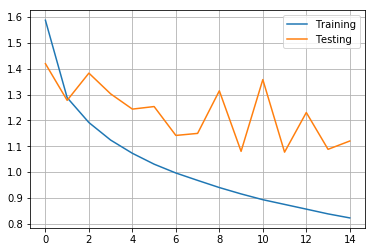

In [68]:
print(history.history.keys())
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [69]:
print(x_test.shape)
print(Y_test.shape)
loss_test, metric_test = modelCNN.evaluate(x_test,Y_test,batch_size=B)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

(10000, 32, 32, 3)
(10000, 10)
10000/10000 [==============================] - 5s 499us/step
Test loss: 1.1203591039657592
Test accuracy: 0.631


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [65]:
pred = model.predict_classes(x_test, verbose=1)
me.confusion_matrix(Y_test, pred)

10000/10000 [==============================] - 4s 445us/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets